In [33]:
d_len = 784
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import pandas as pd

In [34]:
#Obtaining and formatting the data

#Obtaining
mData = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_data, train_labels), (test_data, test_labels) = mData.load_data()


train_data, test_data = np.array(train_data, np.float32), np.array(test_data, np.float32)

# Formatting
train_data, test_data = train_data.reshape([-1, d_len]), test_data.reshape([-1, d_len])

#Normalization
test_data = test_data/255.0
train_data = train_data/255.0

In [35]:
#SVM without Regularization
svm_without_reg = LinearSVC(dual=False,random_state=0, C=1E10)
svm_without_reg.fit(train_data,train_labels)

LinearSVC(C=10000000000.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [36]:
#Scoring
pred = svm_without_reg.predict(test_data)
print("The accuracy score: ", accuracy_score(test_labels,pred))

The accuracy score:  0.9169


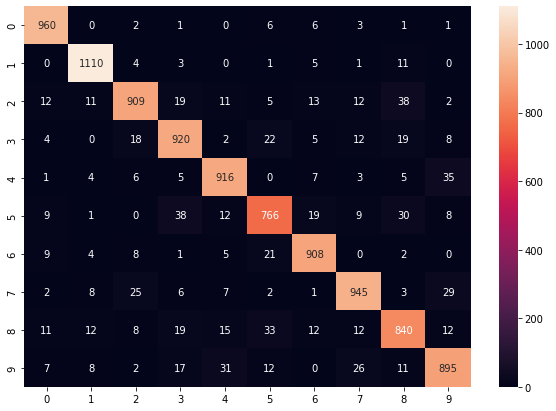

In [37]:
#Create a Confusion Matrix
array = confusion_matrix(test_labels,pred)
df_cm = pd.DataFrame(array, index = [i
      for i in "0123456789"
   ],
   columns = [i
      for i in "0123456789"
   ])
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot = True,fmt='g')